In [34]:
import pandas as pd
from os import path
import numpy as np

#data = pd.read_csv('/Users/hyy/Desktop/Columbia/E 4571/Project/yelp_training_set/rating data.csv',error_bad_lines=False, index_col=0)
#data = pd.read_csv('/Users/hyy/Desktop/Columbia/E 4571/Project/yelp_training_set/rating data 125.csv',error_bad_lines=False, index_col=0)
#data = pd.read_csv('/Users/hyy/Desktop/Columbia/E 4571/Project/yelp_training_set/rating data 115.csv',error_bad_lines=False, index_col=0)
#data = pd.read_csv('/Users/hyy/Desktop/Columbia/E 4571/Project/yelp_training_set/rating data 105.csv',error_bad_lines=False, index_col=0)
data = pd.read_csv('/Users/hyy/Desktop/Columbia/E 4571/Project/yelp_training_set/rating data 95.csv',error_bad_lines=False, index_col=0)

Split the data into train, tune, test set

In [35]:
import random
test = []
tune = []
train = []
random.seed(10)
for j in data.columns:
    for i in data.index:
        r = random.random()
        if not pd.isnull(data[j][i]):
            if r <= 0.6:
                train.append([j, i, data[j][i]])
            elif r > 0.6 and r <= 0.8:
                tune.append([j, i, data[j][i]])
            else:
                test.append([j, i, data[j][i]])
data_train=data.copy()
for item in tune:
    if item[0] in data_train.columns and item[1] in data_train.index:
        data_train[item[0]][item[1]]=np.nan
for item in test:
    if item[0] in data_train.columns and item[1] in data_train.index:
        data_train[item[0]][item[1]]=np.nan

Calculate the mean of all available ratings in train set

In [36]:
x_bar_train=data_train.stack().mean()

Calculate the bias of restaurants in the train set

In [37]:
bias_res_train = []
for i in range(len(data_train.columns)):
    bias_res_train.append(((data_train.sum(axis=0)[i]) / (data_train.count()[i])) - x_bar_train)

Calculate the bias of users in the train set

In [38]:
bias_user_train = []
for i in range(len(data_train)):
    bias_user_train.append(((data_train.sum(axis=1)[i]) / (data_train.count(axis=1)[i])) - x_bar_train)

Calculate baseline model, if user bias is NaN, set user bias as 0

In [39]:
baseline_train=data_train.copy()
for u in range(len(baseline_train)):
    for i in range(len(baseline_train.columns)):
        if pd.isnull(bias_user_train[u]):
            baseline_train.ix[u][i] = x_bar_train + bias_res_train[i]
        else:
            baseline_train.ix[u][i] = x_bar_train + bias_user_train[u] + bias_res_train[i]

Calculate RMSE of the model

In [40]:
import math
SUM = 0
COUNT = 0
for item in test:
    if item[0] in baseline_train.columns and item[1] in baseline_train.index:
        SUM += (baseline_train[item[0]][item[1]] - item[2])**2
        COUNT += 1
RMSE_95 = math.sqrt(SUM / COUNT)

RMSE for different size dataset

In [41]:
RMSE_135,RMSE_125,RMSE_115,RMSE_105,RMSE_95

(1.1459017167255228,
 1.1241635858915149,
 1.1556691020768366,
 1.108762490568112,
 1.117263088161691)

Coverage comparison 

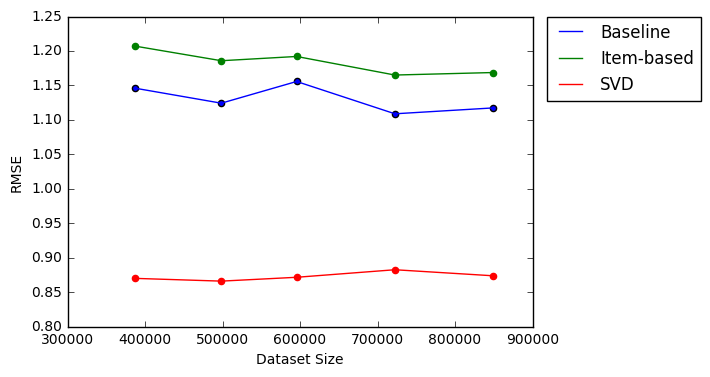

In [42]:
coverage_RMSEs=[1.1459017167255228, 1.1241635858915149, 1.1556691020768366,1.108762490568112,1.117263088161691]
coverage_RMSEs_item=[1.2069856768804772, 1.1858021424127776, 1.1919861843762687,1.1650238390666052,1.1686472176226619]
coverage_RMSEs_svd=[0.8698609691586622,0.8658650182782625,0.8714428756522283,0.8823904744645856,0.8736623512609055]
#test_RMSE135,test_RMSE125,test_RMSE115,test_RMSE105,test_RMSE95 dataset size
coverage_size=[387300, 498491, 595620, 722455, 848598]
from matplotlib import pyplot as plt
baseline=plt.plot(coverage_size,coverage_RMSEs,label='Baseline')
item=plt.plot(coverage_size,coverage_RMSEs_item,label='Item')
svd=plt.plot(coverage_size,coverage_RMSEs_svd,label='SVD')
plt.scatter(coverage_size,coverage_RMSEs)
plt.scatter(coverage_size,coverage_RMSEs_item,color='green')
plt.scatter(coverage_size,coverage_RMSEs_svd,color='red')
plt.legend(['Baseline','Item-based','SVD'],loc=7,bbox_to_anchor=(1.38, .864))
plt.xlabel('Dataset Size')
plt.ylabel('RMSE')
plt.show()
#plt.close